신체 사이즈로 신장 예측 => 회귀

In [1]:
#Libraries for reading and handling the data
import numpy as np
import pandas as pd
import re

#Libraries for data visvalization
import matplotlib.pyplot as plt
import seaborn as sns


#Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#Libraries for creating mL model
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier


#Libraries for creating mL model
from sklearn import metrics

In [2]:
# 드라이브에서 데이터셋 가져오기
df = pd.read_csv('/content/drive/MyDrive/tall.csv', header=0, encoding='euc-kr')
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6,86.4,173.2,86.7,77.1,56.9,27.1,73.7
167979,167980,20170131,97.9,82.7,166.3,90.5,73.4,61.5,28.8,70.7
167980,167981,20170131,97.9,87.2,175.2,94.3,83.1,57.1,27.6,78.7
167981,167982,20170131,85.3,86.8,173.6,75.9,76.6,57.6,24.3,57.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167983 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   순번          167983 non-null  int64  
 1   측정 일자       167983 non-null  int64  
 2   가슴 둘레 센티미터  167982 non-null  float64
 3   소매길이 센티미터   167983 non-null  float64
 4   신장 센티미터     167983 non-null  float64
 5   허리 둘레 센티미터  167983 non-null  float64
 6   샅높이 센티미터    167983 non-null  float64
 7   머리 둘레 센티미터  167981 non-null  float64
 8   발 길이 센티미터   167983 non-null  float64
 9   몸무게 킬로그램    167983 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 12.8 MB


In [4]:
rdf = df.dropna(subset=['머리 둘레 센티미터', '가슴 둘레 센티미터'], how='any', axis=0) 
rdf.info()
# 머리 둘레, 가슴 둘레 null값 삭제
# null값 지우고 167980개 통일

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   순번          167980 non-null  int64  
 1   측정 일자       167980 non-null  int64  
 2   가슴 둘레 센티미터  167980 non-null  float64
 3   소매길이 센티미터   167980 non-null  float64
 4   신장 센티미터     167980 non-null  float64
 5   허리 둘레 센티미터  167980 non-null  float64
 6   샅높이 센티미터    167980 non-null  float64
 7   머리 둘레 센티미터  167980 non-null  float64
 8   발 길이 센티미터   167980 non-null  float64
 9   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 14.1 MB


In [5]:
# null 값 확인
rdf.isnull().sum()

순번            0
측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    0
발 길이 센티미터     0
몸무게 킬로그램      0
dtype: int64

In [6]:
# 분석에 활용할 속성을 선택 (가슴 둘레, 소매길이, 허리 둘레, 샅높이, 머리둘레, 발길이, 몸무게)
X = rdf.iloc[:, [2,3,5,6,7,8,9]] # 독립 변수
y = rdf['신장 센티미터']        # 종속 변수

In [7]:
# X = df.iloc[:, [3, 5, 6, 8, 9]]
# y = df['신장 센티미터'] # 종속 변수

In [8]:
X

,가슴 둘레 센티미터,소매길이 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,96.3,92.6,82.5,83.8,57.1,28.5,73.2
1,101.9,83.8,81.2,74.4,55.0,24.2,65.1
2,99.5,89.6,99.2,84.2,56.3,28.1,93.2
3,98.6,85.5,85.9,76.4,54.5,27.4,71.6
4,94.7,88.1,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...
167978,100.6,86.4,86.7,77.1,56.9,27.1,73.7
167979,97.9,82.7,90.5,73.4,61.5,28.8,70.7
167980,97.9,87.2,94.3,83.1,57.1,27.6,78.7
167981,85.3,86.8,75.9,76.6,57.6,24.3,57.4


In [9]:
y

0         185.5
1         167.2
2         179.9
3         171.4
4         176.9
          ...  
167978    173.2
167979    166.3
167980    175.2
167981    173.6
167982    175.8
Name: 신장 센티미터, Length: 167980, dtype: float64

In [10]:
# 숫자의 수와 차이가 크기 때문에 정규화 작업 
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [11]:
# 검증 데이터셋을 만듭니다 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=777) # 랜덤 추출 값


In [12]:
# 검증 데이터셋을 만듭니다
from sklearn.model_selection import  train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,             # 독립 변수
                                                   y_train,            # 종속 변수
                                                   test_size=0.33,     # 검증 33%
                                                   random_state=777)   # 랜덤 추출 값

# !!! 데이터 수가 부족하면 validation 안 해도 됨!!!

In [13]:
import numpy as np
np.set_printoptions(suppress=True)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [14]:
import numpy as np
np.set_printoptions(suppress=True)

print(X_train[0])

[ 1.0348624   0.94707653  1.1453702   1.36257206 -0.03184425 -0.02387411
  1.64786679]


In [15]:
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# # (데이터[훈련, 테스트 데이터 모두] - 평균) / 표준편차(Standardization)
# X_train = (X_train - mean)/std
# X_test = (X_test-mean) / std

# print(X_train)

# 데이터 형태 확인하기

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)
print(X_train.shape, X_val.shape)

(78782, 7) (78782,)
(50394, 7) (50394,)
(38804, 7) (38804,)
(78782, 7) (38804, 7)


# 데이터 전처리 및 검증 데이터셋 만들기

# 모델 구성하기

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#model.add(Dense(activation='relu', input_shape=(7,)))

model.add(Dense(32, activation='relu', input_shape=(7,)))
model.add(Dense(1)) # 하나의 값을 출력 -> 신장 길이

# 활성화 함수를 안 적은 이유는 리니어가 디폴트이기 때문에 안 적어도 작동 됨

# 모델 설정하기

In [18]:
model.compile(optimizer = 'adam', loss='mse', metrics=['mae', 'mse'])

# 모델 학습하기

In [19]:
history = model.fit(X_train, y_train,
                    epochs=15,                          # 15번 공부시키기
                    validation_data = (X_val, y_val)) 

Epoch 1/15
2462/2462 [==============================] - 10s 3ms/step - loss: 11130.8252 - mae: 91.1295 - mse: 11130.8252 - val_loss: 2673.6118 - val_mae: 37.6419 - val_mse: 2673.6118
Epoch 2/15
2462/2462 [==============================] - 6s 3ms/step - loss: 459.0285 - mae: 15.1459 - mse: 459.0285 - val_loss: 458.8745 - val_mae: 4.8036 - val_mse: 458.8745
Epoch 3/15
2462/2462 [==============================] - 8s 3ms/step - loss: 14.8181 - mae: 2.6725 - mse: 14.8181 - val_loss: 290.2993 - val_mae: 1.8994 - val_mse: 290.2993
Epoch 4/15
2462/2462 [==============================] - 6s 3ms/step - loss: 4.1317 - mae: 1.5338 - mse: 4.1317 - val_loss: 218.7451 - val_mae: 1.3760 - val_mse: 218.7451
Epoch 5/15
2462/2462 [==============================] - 6s 3ms/step - loss: 2.1836 - mae: 1.1125 - mse: 2.1836 - val_loss: 163.4806 - val_mae: 0.9588 - val_mse: 163.4806
Epoch 6/15
2462/2462 [==============================] - 6s 3ms/step - loss: 0.9861 - mae: 0.7273 - mse: 0.9861 - val_loss: 118.818

# 모델 결과 그리기

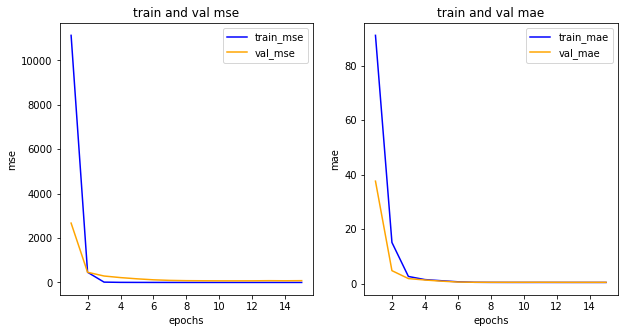

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


# 모델 평가하기

In [21]:
model.evaluate(X_test, y_test)

1575/1575 [==============================] - 3s 2ms/step - loss: 0.3376 - mae: 0.4769 - mse: 0.3376


[0.33755651116371155, 0.47688326239585876, 0.33755651116371155]

# 모델 예측하기

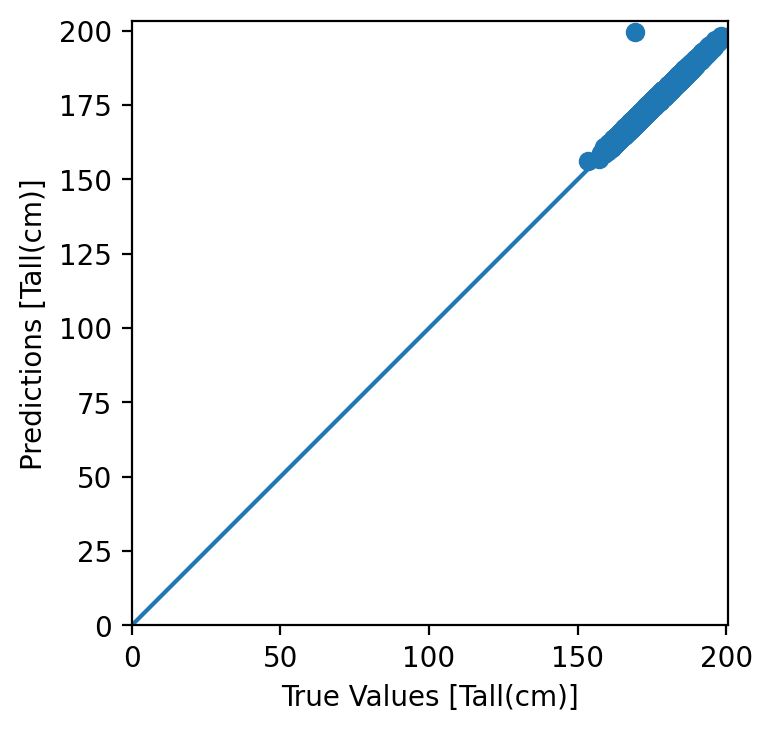

In [35]:
test_predictions = model.predict(X_test).flatten()
plt.figure(dpi=200)
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Tall(cm)]')
plt.ylabel('Predictions [Tall(cm)]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-300, 300], [-300, 300]) # 범위 조절

# 추세선 아래 있는 것들은 실제 값보다 낮게 예측
# 추세선 위에 있는 것들은 실제 값보다 높게 예측
# 추세선과 일치하는 값들은 오차율 0

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
X[0]

array([ 0.07696313,  1.93356124, -0.35272211,  1.17775554, -0.1031317 ,
        1.19240925,  0.07602794])

In [25]:
man_a = np.array([ 0.07696313,  1.93356124, -0.35272211,  1.17775554, -0.1031317 ,1.19240925,  0.07602794]).reshape(1,7)
#가슴 둘레 96.3cm , 소매길이 92.6cm, 허리 둘레 82.5cm, 샅높이 83.8cm, 머리 둘레 57.1cm, 발 길이 28.5cm,	몸무게 73.2kg
model.predict(man_a) # 실제 키 185.5cm


array([[185.05519]], dtype=float32)

In [26]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6) #3등실 탑승, 남성, 19살, 형제없고, 부모나 자녀없음, 싼 가격으로 표를 삼
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6) #1등실 탑승, 여성, 17살,  운임은 비싸게 주었고, 부모와 함께 탑승하고, 약혼자도 있었다



In [27]:
X[1]

array([ 0.68653539, -1.2816482 , -0.46795998, -1.30406627, -0.31699406,
       -1.88407218, -0.51341162])

In [28]:
man_b = np.array([ 0.68653539, -1.2816482 , -0.46795998, -1.30406627, -0.31699406, -1.88407218, -0.51341162]).reshape(1,7)
#가슴 둘레 101.9cm , 소매길이 83.8cm, 허리 둘레 81.2cm, 샅높이 74.4cm, 머리 둘레 55cm, 발 길이 24.2cm,	몸무게 65.1kg
model.predict(man_b) 

array([[167.77908]], dtype=float32)

In [29]:
# 실제 키:167.2cm